In [1]:
import matplotlib.pyplot as plt
import cv2



In [2]:
! git clone https://github.com/Nelson-Gon/unet.git 

Cloning into 'unet'...
remote: Enumerating objects: 451, done.
remote: Counting objects: 100% (451/451), done.
remote: Compressing objects: 100% (344/344), done.
remote: Total 451 (delta 124), reused 432 (delta 105), pack-reused 0
Receiving objects: 100% (451/451), 45.05 MiB | 5.06 MiB/s, done.
Resolving deltas: 100% (124/124), done.


In [3]:
from unet.model import *
from unet.data import *
from unet.augmentation import *

Using TensorFlow backend.


In [4]:
#https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
data_gen_args = dict(rotation_range=45,
                     rescale = 1./255,
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                    shear_range=0.1,
                    zoom_range=0.1,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [7]:
!ls

sample_data  unet


In [8]:
%cd unet/data/membrane

/content/unet/data/membrane/train


In [11]:
! find . -type d

.
./test
./train
./train/label
./train/image
./train/aug


In [ ]:
#imgs_train,imgs_mask_train = geneTrainNpy("aug","aug")

In [ ]:
#show_augmented(number = 6, image_type="masks")

In [14]:
my_generator = trainGenerator(4,'train','image','label',data_gen_args,save_to_dir = "train/aug", seed= 12,
                              target_size = (256, 256))

In [15]:
num_batch = 3
for i,batch in enumerate(my_generator):
  if(i >= num_batch):
    break

Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.


In [76]:

model = unet(input_size = (256, 256, 1), metrics = ['accuracy'], loss=['binary_crossentropy'],learning_rate=0.001)

In [78]:
history = model.fit_generator(my_generator,steps_per_epoch=300,epochs=5)

Epoch 1/5
300/300 [==============================] - 293s 975ms/step - loss: 0.3785 - accuracy: 0.7314
Epoch 2/5
300/300 [==============================] - 291s 971ms/step - loss: 0.3325 - accuracy: 0.7643
Epoch 3/5
300/300 [==============================] - 291s 970ms/step - loss: 0.2916 - accuracy: 0.7867
Epoch 4/5
300/300 [==============================] - 290s 967ms/step - loss: 0.3134 - accuracy: 0.7801
Epoch 5/5
300/300 [==============================] - 289s 964ms/step - loss: 0.3047 - accuracy: 0.7868


Text(0.5, 0, 'epoch')

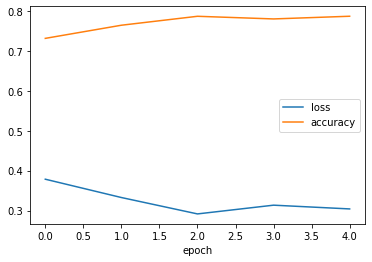

In [79]:
#dir(history)
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.legend(['loss', 'accuracy'])
plt.xlabel('epoch')

In [80]:
model.save("unet_membrane.hdf5")

In [61]:
# only run if you want to delete previous predictions
! rm test/*_predict.png

In [81]:
test_generator = testGenerator("test", 30, image_suffix="png")



In [82]:
model = unet()
model.load_weights("unet_membrane.hdf5")
results = model.predict_generator(test_generator,30,verbose=1)

30/30 [==============================] - 3s 109ms/step


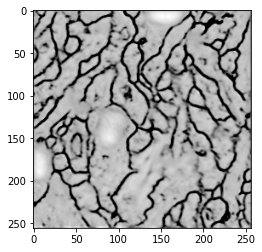

In [85]:
plt.imshow(results[2][:,:,0], cmap="gray")